In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [15]:
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/dan2/updated_best.csv')

In [16]:
csv_df

,CellID,DNA1,AF1,CD31,Ki67,CD68,CD163,CD20,CD4,CD8a,...,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,UMAP_X,UMAP_Y
0,1,1967.393897,1483.656033,465.804438,677.133148,182.382802,468.564494,629.219140,120.654646,173.877947,...,2024.883495,721.0,31.354913,29.315962,0.354722,0.969086,0.751042,-0.288126,42608.985199,38510.445813
1,2,2040.625483,1482.889961,424.957529,743.833977,229.916988,1156.550193,734.996139,128.191120,171.461390,...,2042.876448,518.0,27.810896,23.760244,0.519698,0.966418,0.711538,-0.554064,42574.929227,32154.174037
2,3,1942.463788,1499.770195,441.263231,718.445682,307.281337,1575.454039,703.658774,173.001393,165.869081,...,559.266017,718.0,35.237328,25.987645,0.675344,0.974220,0.725253,-0.633757,7174.332665,13312.043350
3,4,2461.936170,1762.250000,529.908245,896.590426,846.747340,3580.190160,908.356383,142.162234,156.525266,...,609.587766,752.0,35.798416,26.837437,0.661798,0.966581,0.696296,-1.141488,37075.397488,31230.497749
4,5,3514.763473,3447.875749,566.571856,981.797904,255.820359,1280.887725,1166.537425,66.851796,148.896707,...,613.883234,668.0,33.921502,25.172952,0.670296,0.973761,0.734066,1.300686,39415.568065,38237.789133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031667,1031774,2381.862471,1510.460373,1229.756410,560.231935,262.540793,1028.489510,556.993007,304.201632,173.096737,...,41484.846154,858.0,38.781651,28.281511,0.684248,0.972789,0.722222,-0.632073,13706.023005,11558.085938
1031668,1031775,2174.084760,578.123288,342.340753,374.746575,459.856164,1938.887842,393.556507,348.191781,171.476884,...,41586.875856,1168.0,52.446693,28.523412,0.839179,0.970906,0.778667,-0.184416,50795.594431,13596.918582
1031669,1031777,1834.338920,6106.471136,78.122905,68.277467,120.895717,1264.931099,127.493482,47.109870,32.057728,...,41474.914339,537.0,28.112283,24.703231,0.477311,0.947090,0.764957,-1.213656,22535.362108,5674.140073
1031670,1031778,2097.875874,8013.501748,80.195804,53.980769,78.900350,1426.033217,142.846154,5.223776,9.531469,...,41497.912587,572.0,29.003433,25.726677,0.461728,0.942339,0.758621,-0.383420,23417.451185,7055.345416


In [18]:
columns = csv_df.columns
columns

Index(['CellID', 'DNA1', 'AF1', 'CD31', 'Ki67', 'CD68', 'CD163', 'CD20', 'CD4',
       'CD8a', 'CD11c', 'PDL1', 'CD3e', 'ECAD', 'PD1', 'FOXP3', 'CD45',
       'SOX10', 'EMPTY', 'pH3', 'X_centroid', 'Y_centroid', 'Area',
       'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity',
       'Extent', 'Orientation', 'UMAP_X', 'UMAP_Y'],
      dtype='object')

In [20]:
feature_columns = ['DNA1', 'AF1', 'CD31', 'Ki67', 'CD68', 'CD163', 'CD20', 'CD4',
       'CD8a', 'CD11c', 'PDL1', 'CD3e', 'ECAD', 'PD1', 'FOXP3', 'CD45',
       'SOX10', 'pH3',]
feature_data = csv_df[feature_columns]

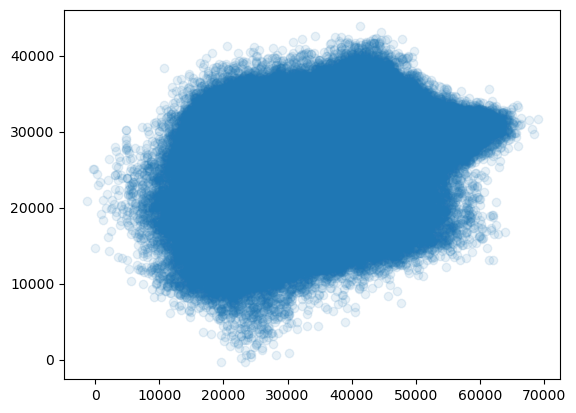

In [ ]:
# plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])
regressor = xgb.XGBRegressor(
                 n_estimators=100,
                 max_depth=9,
                 seed=1000)

regressor.fit(feature_data, csv_df[['UMAP_X','UMAP_Y']])
xgb_preds = regressor.predict(feature_data)
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.1)

In [26]:
explainer = shap.Explainer(regressor)

In [ ]:
# compute shap values in 100 batches in parallel
from joblib import Parallel, delayed
import multiprocessing

total_batches = 100
total_samples = feature_data.shape[0]
batch_size = total_samples // total_batches

# Define a function to process a single batch
def process_batch(i):
    feature_batch = feature_data[i*batch_size:min((i+1)*batch_size, total_samples)]
    return explainer(feature_batch)

# Use all available cores for parallel processing
num_cores = multiprocessing.cpu_count()
print(f"Running on {num_cores} cores")

# Process batches in parallel
shap_values_list = Parallel(n_jobs=num_cores)(
    delayed(process_batch)(i) for i in tqdm(range(total_batches))
)

total_vals = 0
for i in range(len(shap_values_list)):
    total_vals += shap_values_list[i].values.shape[0]
print(total_vals)

Running on 8 cores


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [82]:
# Calculate the remaining 72 samples
processed_samples = batch_size * total_batches  # 1031600
remaining_samples = total_samples - processed_samples  # 72
if remaining_samples > 0:
    print(f"Processing remaining {remaining_samples} samples...")
    remaining_batch = feature_data[processed_samples:total_samples]
    remaining_shap_values = explainer(remaining_batch)
    shap_values_list.append(remaining_shap_values)


Processing remaining 72 samples...


In [80]:
total_samples - total_vals

72

In [85]:
values_matrix = None
for i in tqdm(range(total_batches+1)):
    if values_matrix is None:
        values_matrix = shap_values_list[i].values
    else:
        values_matrix = np.concatenate((values_matrix, shap_values_list[i].values), axis=0)



  0%|          | 0/101 [00:00<?, ?it/s]

In [86]:
values_matrix.shape

(1031672, 18, 2)

In [87]:
values_matrix.shape
# This is of size num_samples x num_features x 2 (x and y)
# reorder it so that the features are alphabetical
feature_columns = ['DNA1', 'AF1', 'CD31', 'Ki67', 'CD68', 'CD163', 'CD20', 'CD4',
       'CD8a', 'CD11c', 'PDL1', 'CD3e', 'ECAD', 'PD1', 'FOXP3', 'CD45',
       'SOX10', 'pH3',]

sorted_feature_columns = sorted(feature_columns)

# Create a mapping from original index to sorted index
feature_indices = {feature: i for i, feature in enumerate(feature_columns)}
sorted_indices = [feature_indices[feature] for feature in sorted_feature_columns]

# Reorder the matrix based on sorted feature indices
reordered_matrix = values_matrix[:, sorted_indices, :]
print(f"Original shape: {values_matrix.shape}, Reordered shape: {reordered_matrix.shape}")




Original shape: (1031672, 18, 2), Reordered shape: (1031672, 18, 2)


In [54]:
# get index of AF1 in feature_columns
af1_index = feature_columns.index('AF1')

# get the shap values for AF1
values_matrix[:, af1_index, :]

# plot the shap values for AF1


array([[ 6725.6816,  3429.5337],
       [ 6302.194 ,  3430.2087],
       [ 4458.0845,  2903.813 ],
       ...,
       [-3926.2478, -2045.7256],
       [-1429.886 , -1053.3862],
       [-7389.924 , -3979.4575]], dtype=float32)

In [55]:
reordered_matrix[:, 0, :]

array([[ 6725.6816,  3429.5337],
       [ 6302.194 ,  3430.2087],
       [ 4458.0845,  2903.813 ],
       ...,
       [-3926.2478, -2045.7256],
       [-1429.886 , -1053.3862],
       [-7389.924 , -3979.4575]], dtype=float32)

In [88]:
# save both the reordered matrix and the original matrix
# make both absolute values
reordered_matrix = np.abs(reordered_matrix)
values_matrix = np.abs(values_matrix)

np.save('reordered_matrix.npy', reordered_matrix)
np.save('original_matrix.npy', values_matrix)


In [57]:
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/dan2/updated_best.csv')

In [64]:
# import KMeans
from sklearn.cluster import KMeans
# create 12 kmeans clusters off of UMAP_X and UMAP_Y
kmeans = KMeans(n_clusters=12, random_state=1000)
kmeans.fit(csv_df[['UMAP_X', 'UMAP_Y']])
csv_df['kmeans_cluster'] = kmeans.labels_
csv_df['kmeans'] = csv_df['kmeans_cluster']
csv_df.to_csv('/Users/swarchol/Research/seal/data/dan2/updated_best_kmeans.csv', index=False)



In [65]:
# csv_dfDrop feature columns and save smaller version
csv_df = csv_df.drop(columns=feature_columns)
csv_df.to_csv('/Users/swarchol/Research/seal/data/dan2/updated_best_kmeans_small.csv', index=False)


In [66]:
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/dan2/updated_best_kmeans_small.csv')

In [67]:
csv_df

,CellID,EMPTY,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,UMAP_X,UMAP_Y,kmeans_cluster,kmeans
0,1,210.054092,7712.443828,2024.883495,721.0,31.354913,29.315962,0.354722,0.969086,0.751042,-0.288126,42608.985199,38510.445813,9,9
1,2,214.542471,8175.500000,2042.876448,518.0,27.810896,23.760244,0.519698,0.966418,0.711538,-0.554064,42574.929227,32154.174037,9,9
2,3,214.105850,9928.213092,559.266017,718.0,35.237328,25.987645,0.675344,0.974220,0.725253,-0.633757,7174.332665,13312.043350,3,3
3,4,215.054521,10027.144947,609.587766,752.0,35.798416,26.837437,0.661798,0.966581,0.696296,-1.141488,37075.397488,31230.497749,7,7
4,5,215.345808,9936.329341,613.883234,668.0,33.921502,25.172952,0.670296,0.973761,0.734066,1.300686,39415.568065,38237.789133,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031667,1031774,217.073427,50141.364802,41484.846154,858.0,38.781651,28.281511,0.684248,0.972789,0.722222,-0.632073,13706.023005,11558.085938,3,3
1031668,1031775,214.565068,50524.721747,41586.875856,1168.0,52.446693,28.523412,0.839179,0.970906,0.778667,-0.184416,50795.594431,13596.918582,10,10
1031669,1031777,208.567970,51433.232775,41474.914339,537.0,28.112283,24.703231,0.477311,0.947090,0.764957,-1.213656,22535.362108,5674.140073,6,6
1031670,1031778,210.064685,51427.914336,41497.912587,572.0,29.003433,25.726677,0.461728,0.942339,0.758621,-0.383420,23417.451185,7055.345416,6,6


In [69]:
np.load('/Users/swarchol/Research/seal/data/greg.shap.npy').shape

(933253, 31, 2)

In [70]:
np.load('/Users/swarchol/Research/seal/data/dan2.shap.npy').shape

(1031600, 18, 2)